<a href="https://colab.research.google.com/github/PhuphaB/Data-Analytics/blob/main/Data_Cleaning_Loan_Default_Prediction_(Group_9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# !pip install summarytools
# !pip install skimpy

In [ ]:
##different csv name in my laptop
#df = pd.read_csv('dataset/LoanDataset - LoansDatasest.csv')
df= pd.read_csv('/content/LoanDataset.csv')

In [ ]:
df.shape

(32586, 13)

In [ ]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [ ]:
## dont need this
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
## need cust id
# df.drop('customer_id',axis=1,inplace=True)

In [ ]:
df.columns

Index(['customer_id', 'customer_age', 'customer_income', 'home_ownership',
       'employment_duration', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'term_years', 'historical_default', 'cred_hist_length',
       'Current_loan_status'],
      dtype='object')

In [ ]:
# +SS
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [ ]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,customer_id[float64],Mean (sd) : 16289.5 (9405.9)min < med < max:1.0 < 16288.0 < 32581.0IQR (CV) : 16289.0 (1.7),"32,577 distinct values","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAABxklEQVR4nO3XQU7CYBBA4fkbJSCkDSHCAbwBSw7hYT0EJ2DhxhU7EtKUUDEarCcAKTXqS963baczixcSUtM0If132V8fIF3i5rsXUkqDiOhd+f0sIj6vnO06T91Nvbvr/HvTNIdTD8+GmlIaTCaTxzzPx223Ho/H27quH0aj0UuWZR+/OU/dTb37J+Z3u12ZUno6Fet3v6i9PM/Hi8XiUBTFW5vF6/V6vFqt7ufz+fNsNivbzHadp+6m3t11vqqq/nK5HG+3215EXBVqREQURfE2nU5f2ywvy3IQETEcDlvPdp2n7qbe/RPzETE499A/U0IwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEKwVCFYKhCMFQhGKoQDFUIhioEQxWCoQrBUIVgqEIwVCEYqhAMVQiGKgRDFYKhCsFQhWCoQjBUIRiqEAxVCIYqBEMVgqEK4eaSl6qq6rf98H6/70dE1HXd32w2d785T91Nvbvr/CV9fQGSljnmc7n3zQAAAABJRU5ErkJggg=="">",3(0.0%)
2,customer_age[int64],Mean (sd) : 27.7 (6.4)min < med < max:3.0 < 26.0 < 144.0IQR (CV) : 7.0 (4.4),62 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB/0lEQVR4nO3azaraUBSG4bWqx26PNEGEOPMSOnDoRfRiz7TzXIsIQRPMMY3o7qjD/iQq5jt9n/naLMJLJLg9xmjA0H169gLAvxg/8nB3n5rZ5IYj2hjj6V77QNfDQnX36WKx+JYkybzvGVVV7d39jVjxyDfqJEmS+WazOaVp2nQdLssy5Hk+L4piYmaE+p976E+/mVmapk2WZe89x6d3XQay+JiCBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFBEKFhPGzF/iTy+XyYmaJu/cZb2OMpzuvhCcZbKh1Xb+cz+evq9VqNBqNmq7zVVXt3f2NWD+GwYbatu04hPC6Xq+b5XK57zJblmXI83xeFMXEzAj1AxhsqL/MZrMmy7L3HqPTuy+Dp+FjChIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIIFRIG/xdqXzfevDLj9tWg/DVUdw9m9rnH2cn1eh2XZRl6zNrxeAxmZnVdh91u99pldrvdfrnl5pWZ2eFwOLr7dzPrNY/OfsQYf/usfwIC/XF51eO2tgAAAABJRU5ErkJggg=="">",0(0.0%)
3,customer_income[object],1. 600002. 300003. 500004. 400005. 450006. 750007. 480008. 650009. 7000010. 4200011. other,"1,046 (3.2%)847 (2.6%)778 (2.4%)658 (2.0%)589 (1.8%)579 (1.8%)532 (1.6%)532 (1.6%)528 (1.6%)524 (1.6%)25,973 (79.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEC0lEQVR4nO3dQW4aWQBF0Y+F3PEEhCyxDC+ARWSxvQgW4H0gCwYhnQk9SBxhJ0PXLQmfM0ozCVJfFarSf6nF5XIZULib+wvweYiNjNjIiI2M2MiIjYzYyIiNjNjILMYYD2OM+3ef/7hcLucZvg83bPn4+Ph1tVptrj88nU4vi8XiX8HxkZar1Wqz2+3O6/X6+xhjHI/HL/v9fnM4HO7HGGLjwyzHGGO9Xn/fbrffrj5/mOn7cMPcIJARGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERG5nlGD/PsL1+cP1n+EjL0+n0st/vN+PqDNvpdHoZY/yY72txi2wQyCz8k1lU/nZlc1VjEn+sqyyrmMqbdZVlFVP627rKsopJeKhLRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5s3gxdiFKf0xeDF2YSqOhZMxeCHjykbG4IWMwQsZgxcyHuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZNwgkHn/M+onlMm8WVdZVjGlu9d11W63O/+K7v3rIOFD/F5X/fpvyyom4waBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNzJt1FUzpel1lWcWkHAsnY11FxpWNjMELGYMXMgYvZDzUJSM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2PwQsbghYxj4WQMXsi4spExeCFj8ELG4IWMh7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbGuoqMdRUZGwQy1lVkXNnIWFeRsa4iY11FxkNdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDgWTsbghYwrGxmDFzIGL2QMXsh4qEtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZx8LJGLyQcYNAxs8oGesqMtZVZKyryLhBICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6ioxj4WSsq8hcX9lc1ZjU78GLsQtTu1utVpunp6dh7MLU7sYY4+Hh4b+5vwi3z0NdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MndjjHE+n/+Z+4tw++5Op9PL8/OzsQuTcyycjMELmfdTPm7fbL9gb97wwu2bc9i0fH3Dy9WLN7hRx+Pxy36/3xwOh/sxRh/bGD/f8LLdbr/VfzmzmO0tPh7qkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkfGGl09k7v/P1294me3oCZ05h02OhX8+sx0LN3gh4waBjNjIiI2M2MiIjYzYyIiNjNjIiI3M/1ze9X6tAWmBAAAAAElFTkSuQmCC"">",0(0.0%)
4,home_ownership[object],1. RENT2.

In [ ]:
# Checks for missing values in columns

df.isnull().sum()

,0
customer_id,3
customer_age,0
customer_income,0
home_ownership,0
employment_duration,895
loan_intent,0
loan_grade,0
loan_amnt,1
loan_int_rate,3116
term_years,0


In [ ]:
# Deleting column historical_default because it contains large number of null values

df.drop('historical_default',axis=1,inplace=True)

In [ ]:
# Filling all null values in loan_int_rate with median values

df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [ ]:
# Remove the currency symbol and commas

def clean_loan_amnt(value):
  if isinstance(value, str):
    value = value.replace('£', '').replace(',', '')
    return float(value)
  else:
    return value

In [ ]:
df['loan_amnt'] = df['loan_amnt'].apply(clean_loan_amnt)

In [ ]:
df['loan_amnt']

,loan_amnt
0,35000.0
1,1000.0
2,5500.0
3,35000.0
4,35000.0
...,...
32581,5800.0
32582,17625.0
32583,35000.0
32584,15000.0


In [ ]:
df['loan_amnt'].fillna(df['loan_amnt'].median(),inplace=True)
#df['loan_amnt'].fillna(0)

In [ ]:
df.isnull().sum()

,0
customer_id,3
customer_age,0
customer_income,0
home_ownership,0
employment_duration,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
term_years,0


In [ ]:
# Filling null values of Current_loan_status with values occuring the most (mode)

df['Current_loan_status']=df['Current_loan_status'].fillna(df['Current_loan_status'].mode()[0])

In [ ]:
# Filling null values of employment_duration with average values of the column

df['employment_duration']=df['employment_duration'].fillna(df['employment_duration'].median())

In [ ]:
# Checks for duplicate values

df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(32580, 12)

In [ ]:
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 32580  │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50    ┃ p75   ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ customer_id            │   3 │  0.01 │  16290 │   9405 │     1 │  8145 │  16290 │ 24430 │   32580 │ ▇▇▇▇▇▇ │  │
│ │ customer_age           │   0 │     0 │  27.73 │  6.359 │     3 │    23 │     26 │    30 │     144 │   ▇▆   │  │
│ │ employment_duration    │   0 │     0 │  4.768 │  4.087 │     0 │     2 │      4 │     7 │     123 │   ▇    │  │
│ │ loan_amnt              │   0 │     0 │   9725 │  21070 │   500 │  5000 │   8000 │ 12200 │ 3500000 │   ▇    │  │
│ │ loan_int_rate          │   0 │     0 │  11.01 │  3.082 │  5.42 │  8.49 │  10.99 │ 13.11 │   23.22 │  ▆▇▇▃  │  │
│ │ term_years             │   0 │     0 │  4.762 │  2.471 │     1 │     3 │      4 │     7 │      10 │ ▇▆▇▃▇▃ │  │
│ │ cred_hist_length       │   0 │     0 │  5.804 │  4.055 │     2 │     3 │      4 │     8 │      30 │  ▇▃▁   │  │
│ └────────────────────────┴─────┴───────┴────────┴────────┴───────┴───────┴────────┴───────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                          ┃ NA    ┃ NA %      ┃ words per row            ┃ total words          ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customer_income                      │     0 │         0 │                        1 │                32580 │  │
│ │ home_ownership                       │     0 │         0 │                        1 │                32580 │  │
│ │ loan_intent                          │     0 │         0 │                        1 │                32580 │  │
│ │ loan_grade                           │     0 │         0 │                        1 │                32580 │  │
│ │ Current_loan_status                  │     0 │         0 │                      1.8 │                58324 │  │
│ └──────────────────────────────────────┴───────┴───────────┴──────────────────────────┴──────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
# Convert income into int type

df['customer_income']=le.fit_transform(df['customer_income'])

In [ ]:
# df['home_ownership']=le.fit_transform(df['home_ownership'])
# df['loan_intent']=le.fit_transform(df['loan_intent'])
# df['loan_grade']=le.fit_transform(df['loan_grade'])

# df['Current_loan_status']=le.fit_transform(df['Current_loan_status'])

In [ ]:
df.dtypes

,0
customer_id,float64
customer_age,int64
customer_income,int64
home_ownership,object
employment_duration,float64
loan_intent,object
loan_grade,object
loan_amnt,float64
loan_int_rate,float64
term_years,int64


In [ ]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status
0,1.0,22,2955,RENT,123.0,PERSONAL,C,35000.0,16.02,10,3,DEFAULT
1,2.0,21,4211,OWN,5.0,EDUCATION,A,1000.0,11.14,1,2,NO DEFAULT
2,3.0,25,4211,MORTGAGE,1.0,MEDICAL,B,5500.0,12.87,5,3,DEFAULT
3,4.0,23,3263,RENT,4.0,MEDICAL,B,35000.0,15.23,10,2,DEFAULT
4,5.0,24,2691,RENT,8.0,MEDICAL,B,35000.0,14.27,10,4,DEFAULT


### **EDA** (Exploratory Data Analysis)

In [ ]:
# +SS

df= df.rename(columns={
    'customer_id' : 'Customer ID',
    'customer_age' : 'Customer Age',
    'customer_income' : 'Customer Income',
    'home_ownership' : 'Home Ownership',
    'employment_duration' : 'Employment Duration',
    'loan_intent' : 'Loan Intent',
    'loan_grade' : 'Loan Grade',
    'loan_amnt' : 'Loan Amount',
    'loan_int_rate' : 'Loan Interest Rate',
    'term_years' : 'Term Years',
    'historical_default' : 'Historical Default',
    'cred_hist_length' : 'Credit History Length',
    'Current_loan_status' : 'Current Loan Status'
})

In [ ]:
num_col= df.select_dtypes(include= ["int","float"])
num_col.columns

Index(['Customer ID', 'Customer Age', 'Customer Income', 'Employment Duration',
       'Loan Amount', 'Loan Interest Rate', 'Term Years',
       'Credit History Length'],
      dtype='object')

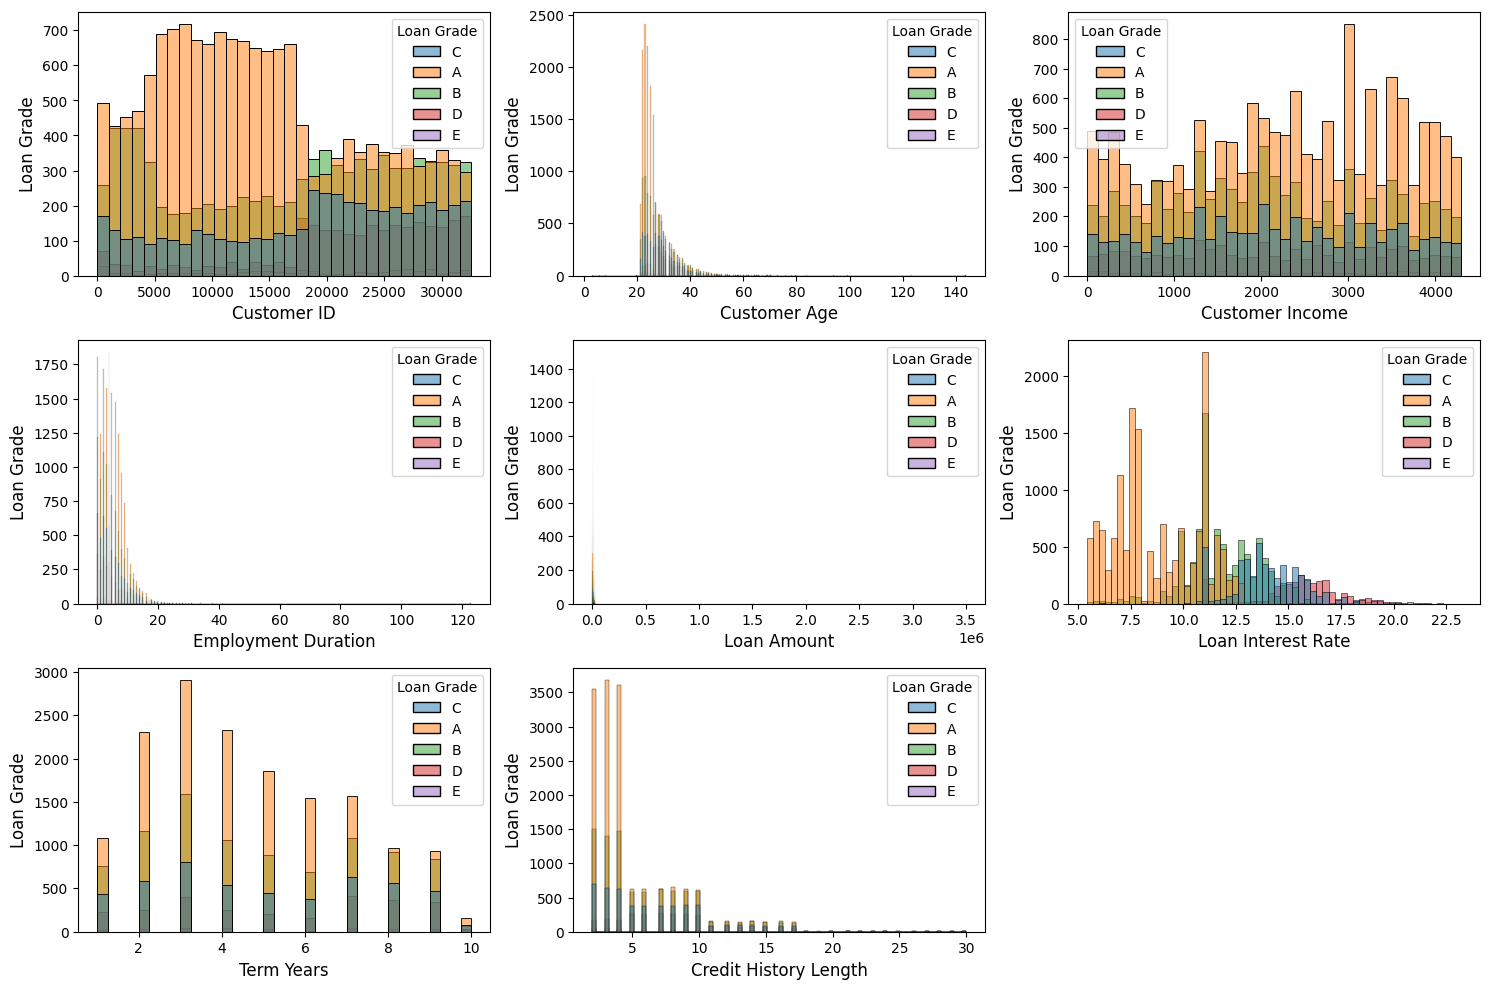

In [ ]:
plt.figure(figsize=(15,10))
i= 1

for column in num_col:
    if i<9:
        ax= plt.subplot(3,3,i)
        sns.histplot(x=df[column],hue=df["Loan Grade"])
        plt.xlabel(column,fontsize= 12)
        plt.ylabel("Loan Grade",fontsize = 12)
    i+= 1
plt.tight_layout()

In [ ]:
cat_col= df.select_dtypes(include= "object")
cat_col.columns

Index(['Home Ownership', 'Loan Intent', 'Loan Grade', 'Current Loan Status'], dtype='object')

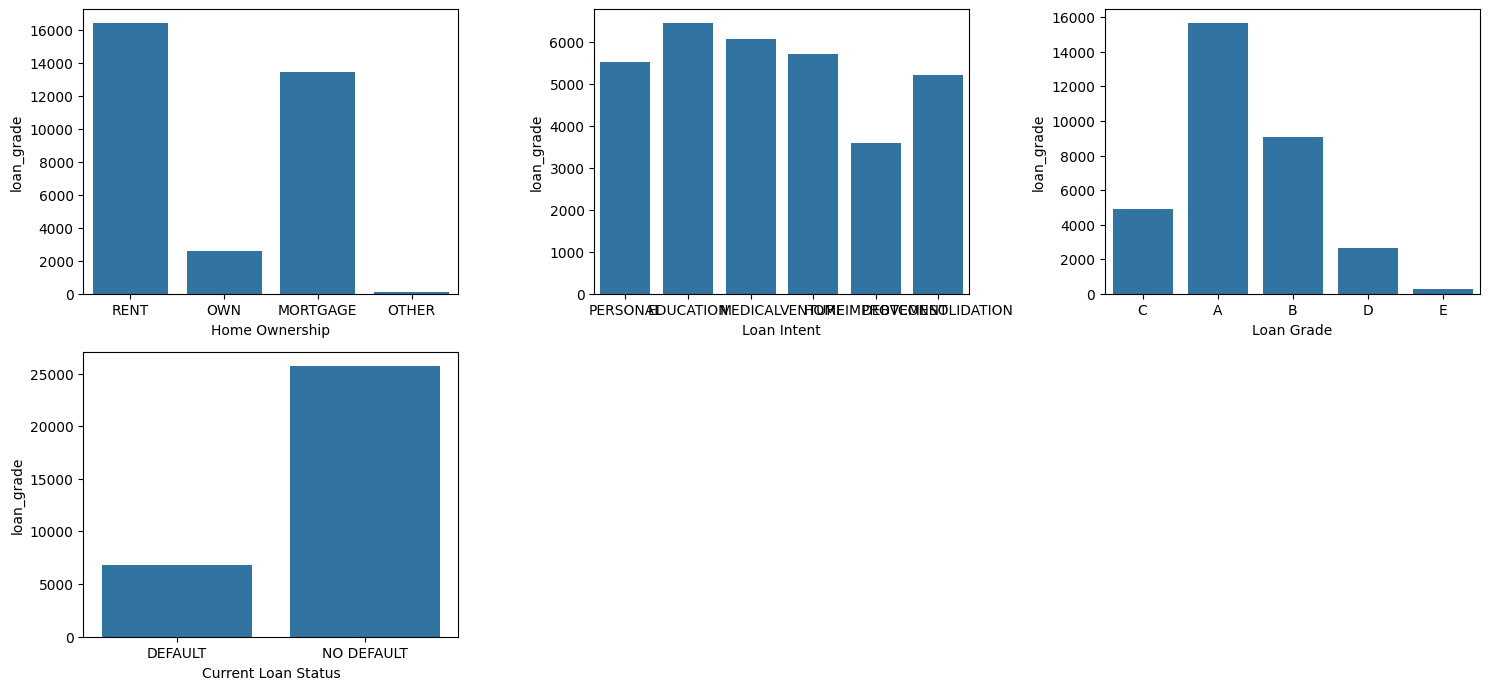

In [ ]:
plt.figure(figsize=(15,10))
i= 1

for column in cat_col:
    if i<9:
        ax= plt.subplot(3,3,i)
        sns.countplot(x=df[column])
        plt.xlabel(column,fontsize= 10)
        plt.ylabel("loan_grade",fontsize = 10)
    i+= 1
plt.tight_layout()

### Insights

1. Maximum employment duration : 1-10 years
2. Interest rate is lowest for Grade A
3. Most people have 0-5 years of credit history
4. Customer income does not affect loan grade
5. Most customers have rented or mortgaged home ownership status
6. Maximum amount of loans are grade A (which minimises bank's risk)
7. Maximum amount of term years for a loan is between 2-4 years.

<Axes: xlabel='Customer Income', ylabel='Home Ownership'>

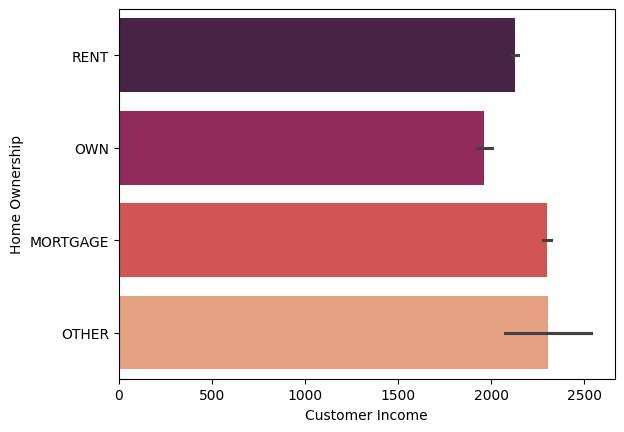

In [ ]:
sns.barplot(x='Customer Income',y='Home Ownership',data=df,palette='rocket')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'PERSONAL'),
  Text(1, 0, 'EDUCATION'),
  Text(2, 0, 'MEDICAL'),
  Text(3, 0, 'VENTURE'),
  Text(4, 0, 'HOMEIMPROVEMENT'),
  Text(5, 0, 'DEBTCONSOLIDATION')])

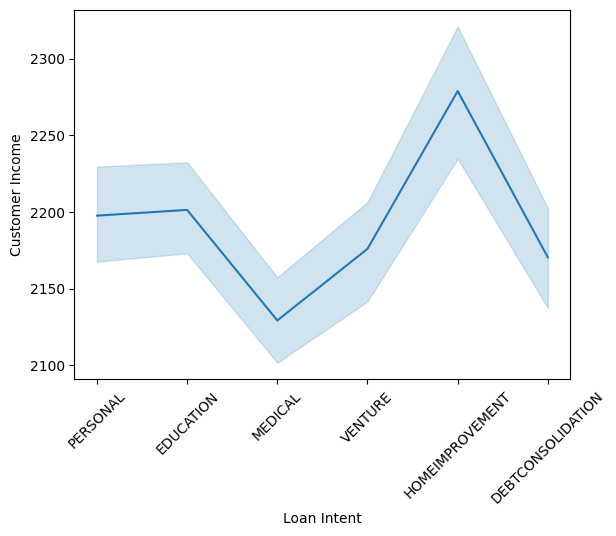

In [ ]:
sns.lineplot(data=df, x='Loan Intent', y='Customer Income')
plt.xticks(rotation=45)

In [ ]:
# Converting object type into int type

df['Home Ownership']=le.fit_transform(df['Home Ownership'])
# RENT:0 ; OWN:1 ; MORTGAGE:2 ; OTHER:3
df['Loan Intent']=le.fit_transform(df['Loan Intent'])
# 1.EDUCATION; 2.MEDICAL; 3.VENTURE; 4.PERSONAL; 5.DEBTCONSOLIDATION; 6.HOMEIMPROVEMENT
df['Loan Grade']=le.fit_transform(df['Loan Grade'])
# 1. A; 2. B; 3. C; 4. D; 5. E
df['Current Loan Status']=le.fit_transform(df['Current Loan Status'])

<Axes: >

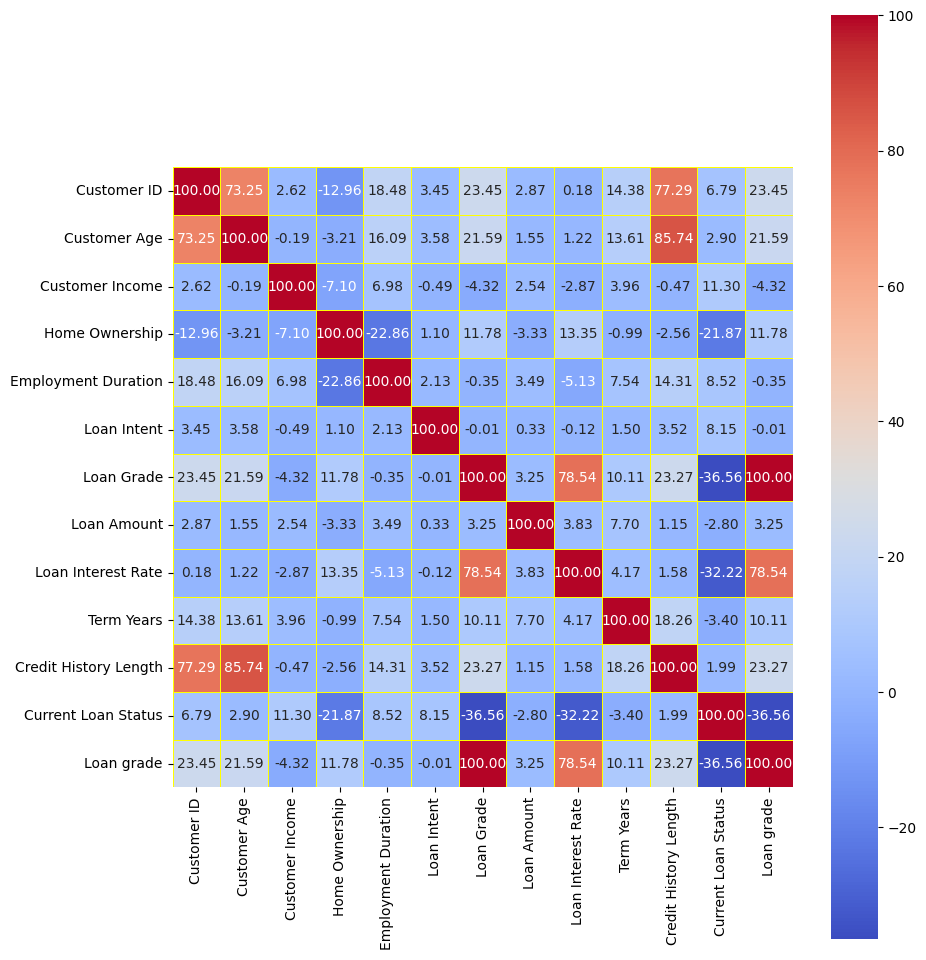

In [ ]:
plt.figure(figsize=(10,12))
sns.heatmap(df.corr()*100,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5,linecolor='yellow',square=True,cbar=True)

In [ ]:
df.describe()

,Customer ID,Customer Age,Customer Income,Home Ownership,Employment Duration,Loan Intent,Loan Grade,Loan Amount,Loan Interest Rate,Term Years,Credit History Length,Current Loan Status,Loan grade
count,32577.000000,32580.000000,32580.000000,32580.000000,32580.000000,32580.000000,32580.000000,3.258000e+04,32580.000000,32580.000000,32580.000000,32580.000000,32580.000000
mean,16289.717101,27.732290,2186.399847,1.676182,4.768017,2.533763,0.860129,9.725239e+03,11.009734,4.761572,5.803929,0.790178,0.860129
std,9405.306296,6.359318,1205.024047,1.433119,4.087432,1.731154,1.009571,2.107076e+04,3.081590,2.470824,4.054743,0.407188,1.009571
min,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+02,5.420000,1.000000,2.000000,0.000000,0.000000
25%,8145.000000,23.000000,1252.000000,0.000000,2.000000,1.000000,0.000000,5.000000e+03,8.490000,3.000000,3.000000,1.000000,0.000000
50%,16289.000000,26.000000,2177.000000,3.000000,4.000000,3.000000,1.000000,8.000000e+03,10.990000,4.000000,4.000000,1.000000,1.000000
75%,24433.000000,30.000000,3235.000000,3.000000,7.000000,4.000000,1.000000,1.220000e+04,13.110000,7.000000,8.000000,1.000000,1.000000
max,32581.000000,144.000000,4298.000000,3.000000,123.000000,5.000000,4.000000,3.500000e+06,23.220000,10.000000,30.000000,1.000000,4.000000


In [ ]:
df= df.rename(columns={
    'Customer ID' : 'customer_id',
    'Customer Age' : 'customer_age',
    'Customer Income' : 'customer_income',
    'Home Ownership' : 'home_ownership',
    'Employment Duration' : 'employment_duration',
    'Loan Intent' : 'loan_intent',
    'Loan Grade' : 'loan_grade',
    'Loan Amount' : 'loan_amnt',
    'Loan Interest Rate' : 'loan_int_rate',
    'Term Years' : 'term_years',
    'Historical Default' : 'historical_default',
    'Credit History Length' : 'cred_hist_length',
    'Current Loan Status' : 'Current_loan_status'
})